In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from Utils.Optuna import optuna_hyperparameter_tuning
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
from pipeline import Pipeline

2024-03-16 16:46:24.538 | INFO     | preprocessing.abstract_prep:<module>:5 - Successfully imported 'abstract_prep' file
2024-03-16 16:46:24.539 | INFO     | preprocessing.check_nans:<module>:6 - Successfully imported 'CheckNans' file
2024-03-16 16:46:24.541 | INFO     | preprocessing.minmax_scaler:<module>:9 - Successfully imported 'MinMaxScaler' file


In [2]:
data = pd.read_csv("Data/cleaned_data.csv")
columns = pd.read_json("Data/selected_features_15.json")[0]

In [3]:
pipeline = Pipeline(data, CatBoostRegressor, catboost=True)
data_preprocessed = pipeline.data_preprocessing(data)
X = data_preprocessed[columns]
y = data_preprocessed['CREDIT_SCORE']
X.shape

2024-03-16 16:46:25.931 | INFO     | pipeline:data_preprocessing:20 - Data Preprocessing
2024-03-16 16:46:25.934 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting
2024-03-16 16:46:25.937 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in dataframe
2024-03-16 16:46:25.940 | INFO     | preprocessing.minmax_scaler:fit:17 - _MinMaxScaler preprocessing class_ is fitting
/home/erikaramovich/Documents/MtqiZark/credit_score_prediction/preprocessing/minmax_scaler.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  json_dict[data.columns[i]] = [min_scores[i], max_scores[i]]
2024-03-16 16:46:25.946 | INFO     | preprocessing.minmax_scaler:fit:30 - _MinMaxScaler preprocessing class_ fitting ended
2024-03-16 16:46:25.948 | INFO     | preprocessing.minmax_scaler:transform:50 -

(878, 37)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_eval.shape, y_eval.shape

,R_ENTERTAINMENT,CAT_CREDIT_CARD,R_CLOTHING_DEBT,R_GAMBLING,R_TAX_INCOME,R_HEALTH_DEBT,R_TAX_SAVINGS,R_ENTERTAINMENT_DEBT,R_EDUCATION_INCOME,R_TAX,...,R_HOUSING_DEBT,R_SAVINGS_INCOME,T_FINES_12,R_EXPENDITURE,R_DEBT_SAVINGS,CAT_GAMBLING,T_FINES_6,R_GROCERIES_DEBT,R_UTILITIES_DEBT,R_TRAVEL_DEBT
567,0.533183,0.0,0.021067,0.512489,0.061772,0.040362,0.003069,0.050308,0.000000,0.198379,...,0.070965,0.651721,0.0,0.579533,0.000570,0.5,0.0,0.050767,0.054029,0.040626
334,0.555556,0.0,0.104545,0.558799,0.292541,0.011961,0.084715,0.083047,0.113919,0.500000,...,0.000000,0.112853,0.0,0.569282,0.003294,0.0,0.0,0.024561,0.030499,0.045736
707,0.320010,0.0,0.017753,0.407522,0.512821,0.002313,0.300184,0.015994,0.000000,0.363745,...,0.000000,0.055862,0.0,0.494698,0.051903,1.0,0.0,0.006042,0.007473,0.000000
265,0.282303,1.0,0.003472,0.351389,0.469697,0.001427,0.079804,0.004580,0.054885,0.500000,...,0.005395,0.191848,0.0,0.477024,0.016557,1.0,0.0,0.004254,0.006867,0.004865
738,0.472851,0.0,0.014518,0.507999,0.391608,0.002461,0.344383,0.012810,0.000000,0.499400,...,0.008786,0.037241,0.0,0.577943,0.077854,1.0,0.0,0.003825,0.005251,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.304173,1.0,0.004182,0.435869,0.500000,0.004036,0.083487,0.006870,0.000000,0.667467,...,0.000000,0.195752,0.0,0.521739,0.012854,1.0,0.0,0.006864,0.010301,0.004702
6,0.309703,1.0,0.001578,0.354477,0.611888,0.001969,0.380602,0.005761,0.000000,0.000000,...,0.000000,0.052522,0.0,0.208378,0.071321,0.0,0.0,0.004505,0.008382,0.003830
727,0.282051,0.0,0.028562,0.122088,0.072261,0.053849,0.003069,0.034528,0.000000,0.361945,...,0.000000,0.701375,0.0,0.785967,0.000689,0.0,0.0,0.047084,0.044940,0.047167
677,0.283560,0.0,0.054127,0.608476,0.060606,0.065515,0.002455,0.066087,0.000000,0.198379,...,0.114570,0.862754,0.0,0.620361,0.000259,0.5,0.0,0.081906,0.087457,0.075051


<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

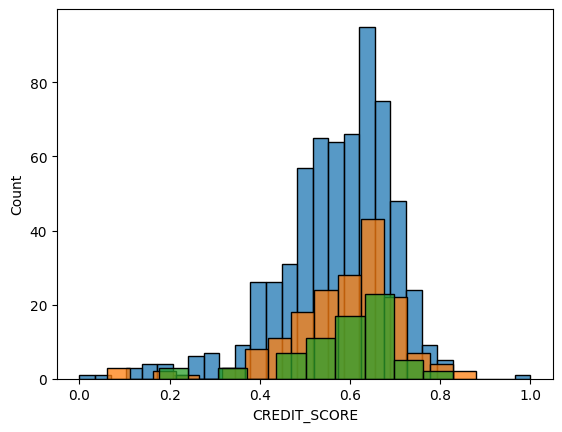

In [5]:
import seaborn as sns
sns.histplot(y_train)
sns.histplot(y_valid)
sns.histplot(y_eval)

In [6]:
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_loguniform("learning_rate", 0.001, 1)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_loguniform('l2_leaf_reg', 0.01, 100)
    param['min_child_samples'] = trial.suggest_int('min_child_samples', 1, 200)
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = trial.suggest_int('iterations', 100, 2000)
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_eval.copy(), y_eval.copy())],
                  early_stopping_rounds=10)
    loss = mean_squared_error(y_valid, regressor.predict(X_valid.copy()))
    return loss


In [ ]:
# {
#     'learning_rate': 0.6063757568124354,
#     'depth': 6,
#     'l2_leaf_reg': 7.17402991755073,
#     'min_child_samples': 32,
#     'iterationsc': 835
# }

In [ ]:
%%time
study = optuna.create_study(study_name=f'catboost-seed{42}')
study.optimize(objective, n_trials=5000, n_jobs=-1, timeout=2400)

[I 2024-03-15 15:15:15,089] A new study created in memory with name: catboost-seed42
C:\Users\user\AppData\Local\Temp\ipykernel_16088\1974728125.py:3: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\user\AppData\Local\Temp\ipykernel_16088\1974728125.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
[I 2024-03-15 15:15:16,946] Trial 6 finished with value: 3767.801531023317 and parameters: {'learning_rate': 0.012, 'depth': 11, 'l2_leaf_reg': 5.0, 'min_child_samples': 32}. Best 

KeyboardInterrupt: 

In [ ]:
study.best_value

3452.233121266844

In [ ]:
study.best_params


{'learning_rate': 0.02,
 'depth': 13,
 'l2_leaf_reg': 4.0,
 'min_child_samples': 32}

In [ ]:
{
    'learning_rate': 0.6063757568124354,
    'depth': 6,
    'l2_leaf_reg': 7.17402991755073,
    'min_child_samples': 32,
    'iterations': 835
}

In [8]:
%%time
optimized_regressor = CatBoostRegressor(learning_rate=0.6033700598512344,
                                        depth=4,
                                        l2_leaf_reg=38.92268508672135,
                                        min_child_samples=123,
                                        grow_policy='Depthwise',
                                        iterations=497,
                                        use_best_model=True,
                                        eval_metric='RMSE',
                                        od_type='iter',
                                        od_wait=20,
                                        random_state=42,
                                        logging_level='Silent',
                                        task_type='GPU')
optimized_regressor.fit(X_train.copy(), y_train.copy(),
                        eval_set=[(X_eval.copy(), y_eval.copy())],
                        plot=True,
                        early_stopping_rounds=10)
pred_train = optimized_regressor.predict(X_train.copy())
pred_valid = optimized_regressor.predict(X_valid.copy())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 185 ms, sys: 709 ms, total: 894 ms
Wall time: 1.09 s


In [9]:
optimized_regressor.tree_count_

26

In [10]:
optimized_regressor.get_best_iteration()

25

In [ ]:
# last Spo predcition scores
# {'learning_rate': 0.6033700598512344,
#  'depth': 4,
#  'l2_leaf_reg': 38.92268508672135,
#  'min_child_samples': 123,
#  'iterations': 497}

In [11]:
print("Training set metrics:")
print(mean_squared_error(y_train, pred_train))
print(r2_score(y_train, pred_train))
print(mean_absolute_error(y_train, pred_train))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

print("Validation set metrics:")
print(mean_squared_error(y_valid, pred_valid))
print(r2_score(y_valid, pred_valid))
print(mean_absolute_error(y_valid, pred_valid))
print(np.sqrt(mean_squared_error(y_valid, pred_valid)))


Training set metrics:
0.0018324931558174763
0.88393256255424
0.03287470235193538
0.042807629644929845
Validation set metrics:
0.003973549042902641
0.7804104782312765
0.04586704483814307
0.06303609317607367


In [17]:
from preprocessing.minmax_scaler import MinMaxScaling

predicted = MinMaxScaling().inverse_transform(pred_valid)
actual = MinMaxScaling().inverse_transform(y_valid)
print(mean_squared_error(actual, predicted))
print(r2_score(actual, predicted))
print(mean_absolute_error(actual, predicted))
print(np.sqrt(mean_squared_error(actual, predicted)))

993.3872607256602
0.7804104782312765
22.93352241907153
31.51804658803683


In [ ]:
# Training set metrics:
# 0.0010818507548037424
# 0.9314771548203596
# 0.024995828691825792
# 0.03289149973479079
# Validation set metrics:
# 0.003781104669540127
# 0.7910454968147861
# 0.04361746360243078
# 0.061490687665207704

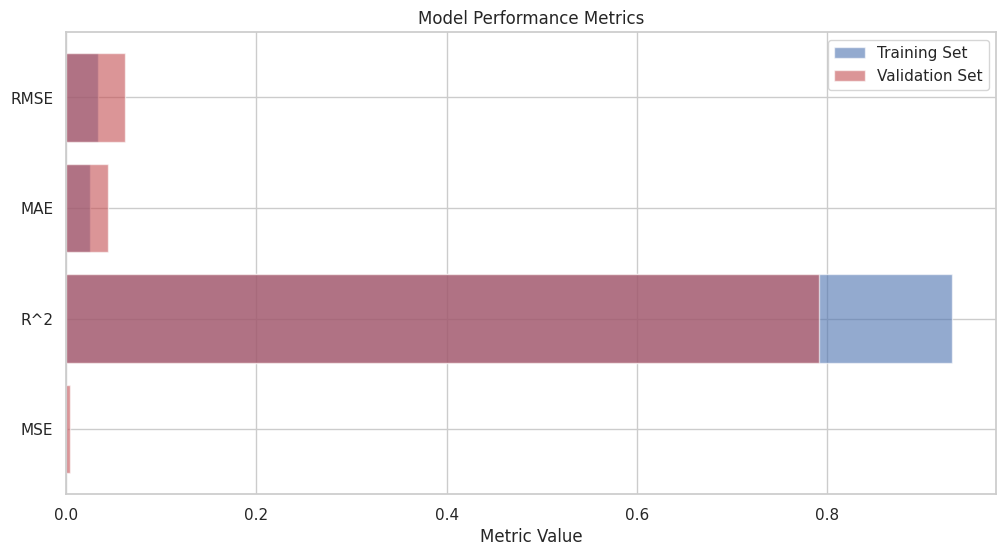

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the metrics
def plot_metrics(y_true_train, y_pred_train, y_true_valid, y_pred_valid):
    # Metrics calculation
    mse_train = mean_squared_error(y_true_train, y_pred_train)
    r2_train = r2_score(y_true_train, y_pred_train)
    mae_train = mean_absolute_error(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    mse_valid = mean_squared_error(y_true_valid, y_pred_valid)
    r2_valid = r2_score(y_true_valid, y_pred_valid)
    mae_valid = mean_absolute_error(y_true_valid, y_pred_valid)
    rmse_valid = np.sqrt(mse_valid)

    # Plotting
    metrics = ['MSE', 'R^2', 'MAE', 'RMSE']
    train_values = [mse_train, r2_train, mae_train, rmse_train]
    valid_values = [mse_valid, r2_valid, mae_valid, rmse_valid]

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    plt.barh(metrics, train_values, color='b', alpha=0.6, label='Training Set')
    plt.barh(metrics, valid_values, color='r', alpha=0.6, label='Validation Set')

    plt.xlabel('Metric Value')
    plt.title('Model Performance Metrics')
    plt.legend()
    plt.show()

# Call the function with your prediction results
plot_metrics(y_train, pred_train, y_valid, pred_valid)


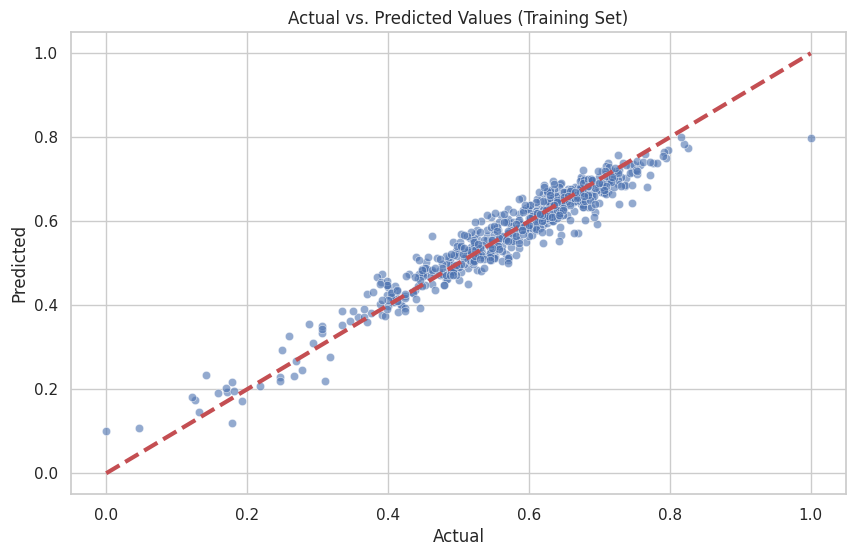

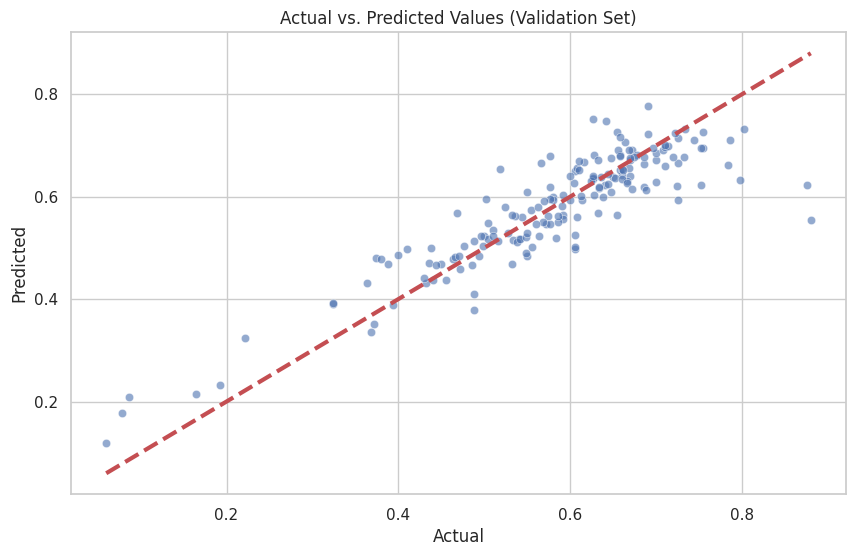

In [ ]:
def plot_actual_vs_predicted(y_true, y_pred, dataset_type='Training'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=3) # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted Values ({dataset_type} Set)')
    plt.show()

plot_actual_vs_predicted(y_train, pred_train, 'Training')
plot_actual_vs_predicted(y_valid, pred_valid, 'Validation')


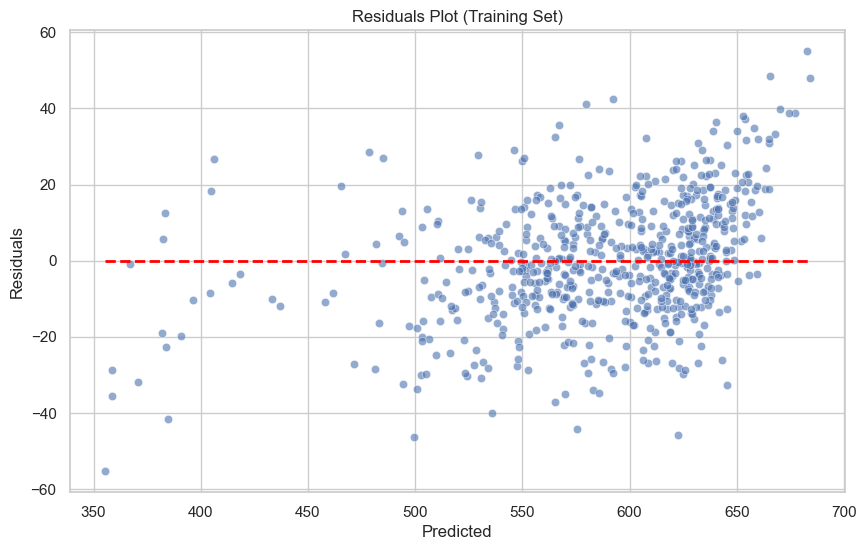

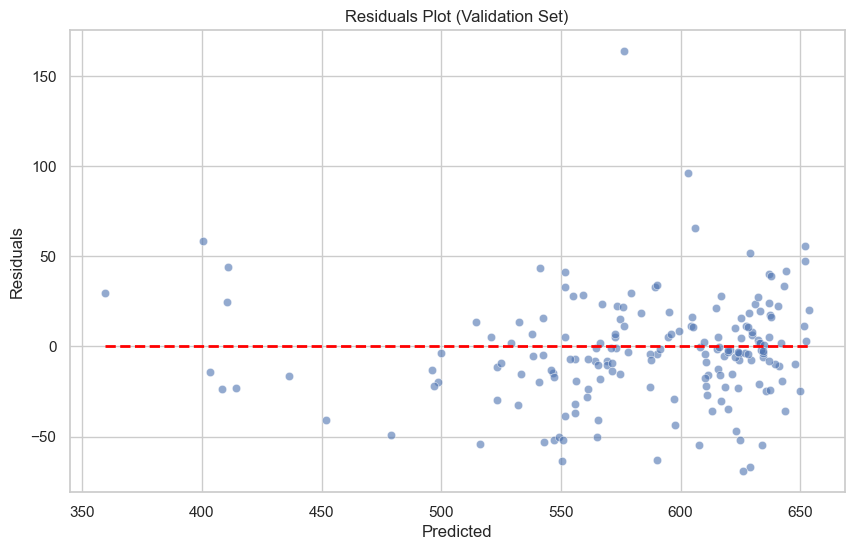

In [ ]:
def plot_residuals(y_true, y_pred, dataset_type='Training'):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot ({dataset_type} Set)')
    plt.show()

plot_residuals(y_train, pred_train, 'Training')
plot_residuals(y_valid, pred_valid, 'Validation')


In [ ]:
data_test = 